# Case Study: Employee Attrition Method - 3

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier

In [2]:
df_employee_detail = pd.read_excel('WA_Fn-UseC_-HR-Employee-Attrition.xlsx')

In [3]:
df_employee_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [4]:
df_employee_detail.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

### Imbalanced datasets as count of negative Employee Attrtion is much higher than count of positive Employee Attrtion. 

### Upsampling the number of positive Employee Attrtion observations in dataset to avoid Accuracy Paradox

In [5]:
from sklearn.utils import resample

In [6]:
attr_yes = df_employee_detail[df_employee_detail['Attrition'] == 'Yes']

In [7]:
attr_no = df_employee_detail[df_employee_detail['Attrition'] == 'No']

In [8]:
attr_yes_upsampled = resample(attr_yes,replace = True, n_samples=1000)

In [9]:
attr_yes.shape

(237, 35)

In [10]:
attr_yes_upsampled.shape

(1000, 35)

In [11]:
attr_yes_upsampled.index.value_counts()

776     14
797     11
264     10
666     10
1223     9
892      9
34       9
422      8
463      8
357      8
495      8
636      8
662      8
1249     8
122      8
829      8
405      8
831      7
607      7
440      7
828      7
42       7
51       7
89       7
205      7
102      7
443      7
259      7
1297     7
566      7
        ..
1379     2
504      2
525      2
1339     2
1332     2
1281     2
1021     2
366      2
1213     2
779      2
132      2
762      2
731      2
706      1
317      1
378      1
421      1
1153     1
482      1
1365     1
1338     1
693      1
981      1
980      1
725      1
1298     1
789      1
177      1
1255     1
1291     1
Length: 234, dtype: int64

In [12]:
new_df_employee = pd.concat([attr_no,attr_yes_upsampled])

In [13]:
new_df_employee.Attrition.value_counts()

No     1233
Yes    1000
Name: Attrition, dtype: int64

In [14]:
from sklearn.utils import shuffle

In [15]:
new_df_employee = shuffle(new_df_employee)

## Encoding the categorical features and the target value. 1- Yes. 0-No.

In [16]:
X_features = ['Age','DailyRate','DistanceFromHome','HourlyRate', 'MonthlyIncome',
                'MonthlyRate','PercentSalaryHike', 'TotalWorkingYears','TrainingTimesLastYear',
                'YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager',
                'BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction','Gender',
                'JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','NumCompaniesWorked',
                'OverTime','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance'
              ]

categorical_features = ['BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction','Gender',
                'JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','NumCompaniesWorked',
                'OverTime','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']

In [17]:
employee_encoded_df = pd.get_dummies(data=new_df_employee[X_features],
                                     columns=categorical_features,
                                     drop_first=True)

In [18]:
Y = new_df_employee.Attrition.map(lambda x: int(x=='Yes'))
X = employee_encoded_df

## Splitting the dataset into train and test set

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3, random_state=42)

## Building Random Forest Classifier model

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rfc_initial = RandomForestClassifier(n_estimators=10,max_depth=10)

In [22]:
rfc_initial.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Accuracy of the model on the test data

In [24]:
import nbimporter

In [25]:
from Employee_Attrition_1 import draw_cm,draw_roc_auc_curve,display_classification_report

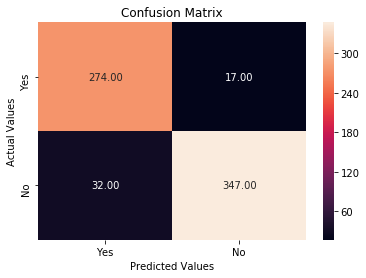

In [26]:
draw_cm(y_test,rfc_initial.predict(x_test))

In [28]:
display_classification_report(y_test,rfc_initial.predict(x_test))

             precision    recall  f1-score   support

          0       0.95      0.92      0.93       379
          1       0.90      0.94      0.92       291

avg / total       0.93      0.93      0.93       670



In [32]:
y_test.value_counts() #Almost Balanced data set

0    379
1    291
Name: Attrition, dtype: int64

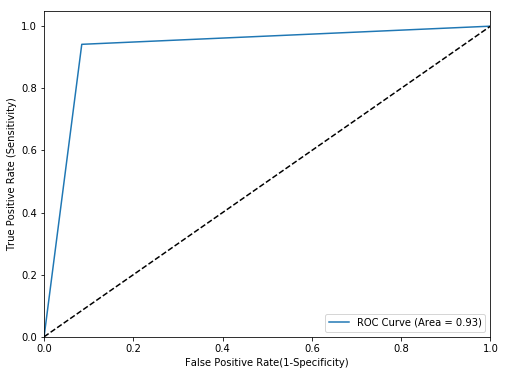

In [33]:
fpr,tpr,thresholds = draw_roc_auc_curve(y_test,rfc_initial.predict(x_test))

## Hyperparameter tuning using GridSearchCV to find the best parameters in model building:

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
tuned_parameters = [{'max_depth':range(10,15),
                    'n_estimators': range(10,20),
                     'max_features': ['sqrt',0.2],
                     'criterion':['gini','entropy']
                    }]

In [36]:
rfc_final = GridSearchCV(estimator=RandomForestClassifier(),param_grid=tuned_parameters,scoring='roc_auc',cv=5)

In [37]:
rfc_final.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': range(10, 15), 'n_estimators': range(10, 20), 'max_features': ['sqrt', 0.2], 'criterion': ['gini', 'entropy']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [40]:
rfc_final.best_score_ # WOW, that's 97% accuracy

0.9760739627385296

In [41]:
rfc_final.best_params_

{'criterion': 'entropy',
 'max_depth': 14,
 'max_features': 0.2,
 'n_estimators': 17}

## Building the Random Forest Classifier model again with the best optimal parameters

In [43]:
rfc_initial_model = RandomForestClassifier(criterion='entropy',max_depth= 14,max_features= 0.2,n_estimators= 17)

In [44]:
rfc_initial_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=14, max_features=0.2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=17, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Accuracy on test data

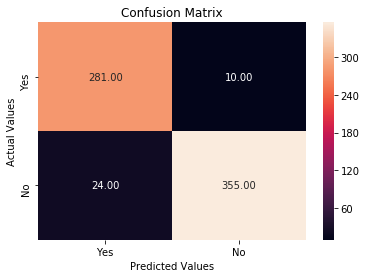

In [45]:
draw_cm(y_test,rfc_initial_model.predict(x_test))

In [46]:
display_classification_report(y_test,rfc_initial_model.predict(x_test))

             precision    recall  f1-score   support

          0       0.97      0.94      0.95       379
          1       0.92      0.97      0.94       291

avg / total       0.95      0.95      0.95       670



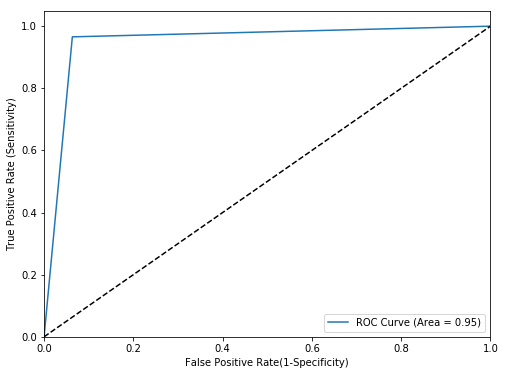

In [48]:
fpr,tpr,thresholds = draw_roc_auc_curve(y_test,rfc_initial_model.predict(x_test))

## Checking accuracy using k-fold cross-validation

In [53]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(estimator=rfc_initial_model,X=x_test,y=y_test,cv=10,scoring='roc_auc')
print(np.mean(cv_scores))

0.9207304082667059


## Finding important features which drive the model

In [60]:
imp_features = pd.DataFrame({'feature': x_train.columns,
                            'importance': rfc_initial_model.feature_importances_,
                            })

In [62]:
imp_features = imp_features.sort_values(by='importance',ascending=False)

In [64]:
imp_features['cumulative_sum']=imp_features.importance.cumsum() * 100

In [66]:
imp_features.head()

,feature,importance,cumulative_sum
4,MonthlyIncome,0.083396,8.339646
59,OverTime_Yes,0.062918,14.631403
0,Age,0.061794,20.810830
7,TotalWorkingYears,0.058992,26.710058
3,HourlyRate,0.052821,31.992153


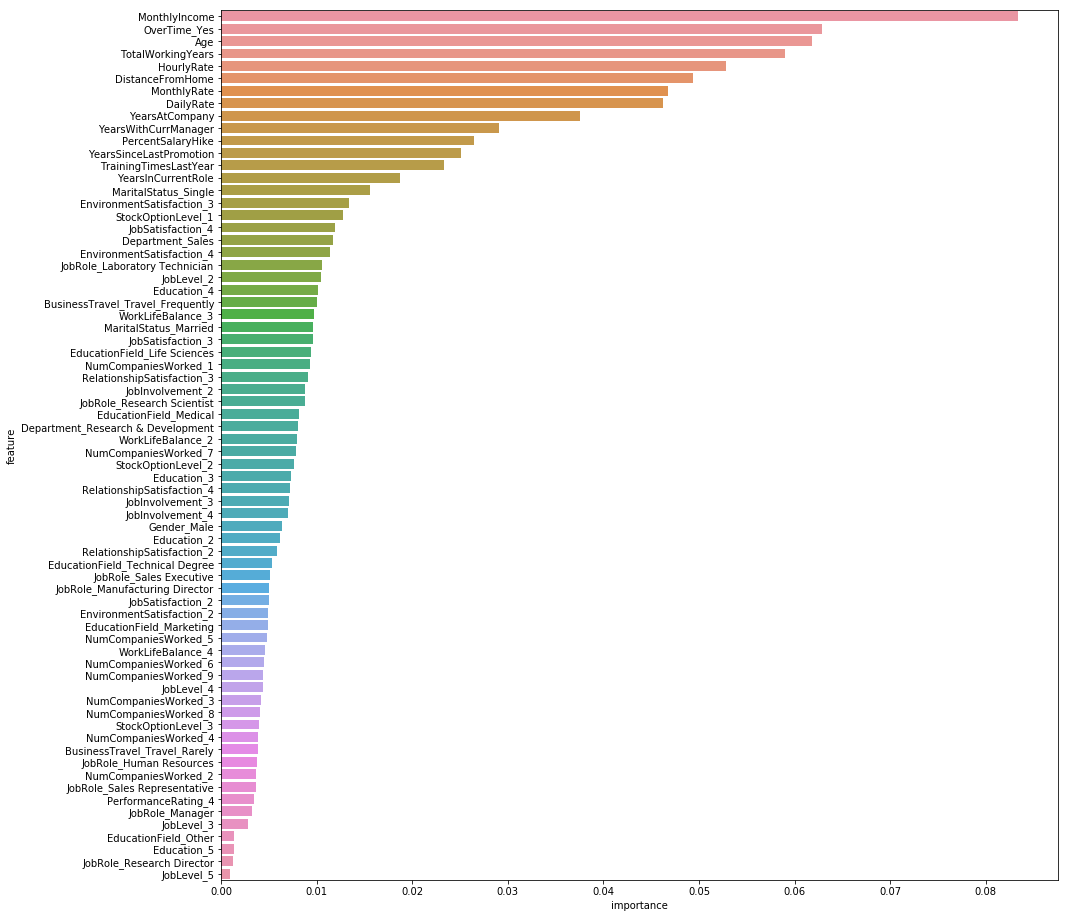

In [76]:
plt.figure(figsize=(15,16))
sns.barplot(x='importance',y='feature',data=imp_features)